# Hacktiv8 Phase 0: Non Graded Challenge 12

---

By [Rifky Aliffa](https://github.com/Penzragon)

Dataset yang digunakan adalah dataset Covid-19 Indonesia, yang dapat dilihat di [Kaggle](https://www.kaggle.com/hendratno/covid19-indonesia).

Instructions:

- Lakukan hypothesis testing terhadap dataset diatas.
- Ambil kesimpulan dari hasil analisa.

## Import Library

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading

In [2]:
covid = pd.read_csv('covid_19_indonesia_time_series_all.csv')
covid.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,105.13%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,100.00%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,2,0,3,...,0.511648,0.16,0.33,0.0,0.00,0.00,0.00%,150.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,95.35%,1.0,1.0


In [3]:
covid['Date'] = pd.to_datetime(covid['Date'])

### Data Characteristics

In [4]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21759 entries, 0 to 21758
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         21759 non-null  datetime64[ns]
 1   Location ISO Code            21759 non-null  object        
 2   Location                     21759 non-null  object        
 3   New Cases                    21759 non-null  int64         
 4   New Deaths                   21759 non-null  int64         
 5   New Recovered                21759 non-null  int64         
 6   New Active Cases             21759 non-null  int64         
 7   Total Cases                  21759 non-null  int64         
 8   Total Deaths                 21759 non-null  int64         
 9   Total Recovered              21759 non-null  int64         
 10  Total Active Cases           21759 non-null  int64         
 11  Location Level               21759 non-nu

In [5]:
covid.describe().T

,count,mean,std,min,25%,50%,75%,max
New Cases,21759.0,3.912936e+02,2.074551e+03,0.000000,7.000000e+00,4.100000e+01,1.510000e+02,5.675700e+04
New Deaths,21759.0,1.322041e+01,7.648262e+01,0.000000,0.000000e+00,1.000000e+00,5.000000e+00,2.069000e+03
New Recovered,21759.0,3.773110e+02,1.999063e+03,0.000000,4.000000e+00,3.100000e+01,1.430000e+02,4.883200e+04
New Active Cases,21759.0,7.621674e-01,9.372135e+02,-25725.000000,-1.600000e+01,0.000000e+00,2.700000e+01,3.672600e+04
Total Cases,21759.0,8.525997e+04,3.685133e+05,1.000000,1.822500e+03,1.078000e+04,3.646450e+04,4.257243e+06
Total Deaths,21759.0,2.648289e+03,1.177601e+04,0.000000,5.000000e+01,2.830000e+02,1.050000e+03,1.438580e+05
Total Recovered,21759.0,7.671260e+04,3.403957e+05,0.000000,1.038500e+03,8.745000e+03,3.293250e+04,4.105680e+06
Total Active Cases,21759.0,5.899079e+03,2.751810e+04,-2306.000000,1.820000e+02,9.190000e+02,2.607500e+03,5.741350e+05
City or Regency,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Regencies,21759.0,2.416026e+01,6.870827e+01,1.000000,7.000000e+00,1.100000e+01,1.800000e+01,4.160000e+02


## Data Exploration

<AxesSubplot:xlabel='New Active Cases', ylabel='Count'>

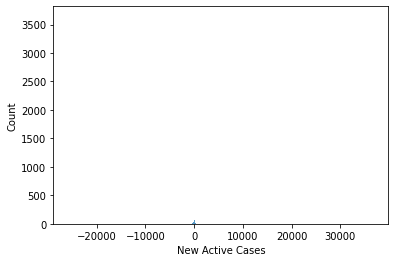

In [6]:
sns.histplot(data=covid, x='New Active Cases')

<AxesSubplot:xlabel='New Active Cases'>

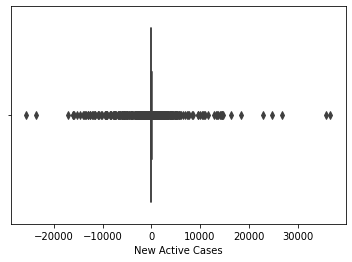

In [7]:
sns.boxplot(data=covid, x='New Active Cases')

### Outlier Removal

In [8]:
Q1 = np.quantile(covid['New Active Cases'], 0.25)
Q3 = np.quantile(covid['New Active Cases'], 0.75)
IQR = Q3 - Q1

In [9]:
lower_limit = Q1 - (1.5 * IQR)
upper_limit = Q3 + (1.5 * IQR)

In [10]:
covid = covid[(covid['New Active Cases'] > lower_limit) & (covid['New Active Cases'] < upper_limit)]

<AxesSubplot:xlabel='New Active Cases', ylabel='Count'>

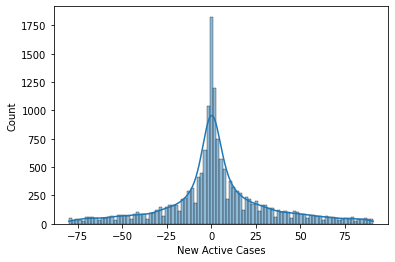

In [11]:
sns.histplot(data=covid, x='New Active Cases', kde=True)

<AxesSubplot:xlabel='New Active Cases'>

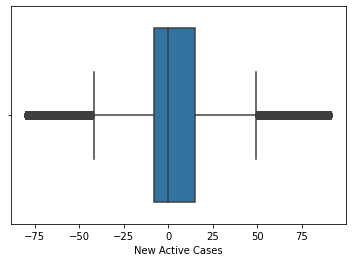

In [12]:
sns.boxplot(data=covid, x='New Active Cases')

### Hypothesis Testing

In [13]:
jabar = covid[covid['Location'] == 'Jawa Barat']

In [14]:
jabar_2020 = jabar[jabar['Date'].dt.year == 2020]

<AxesSubplot:xlabel='New Active Cases', ylabel='Count'>

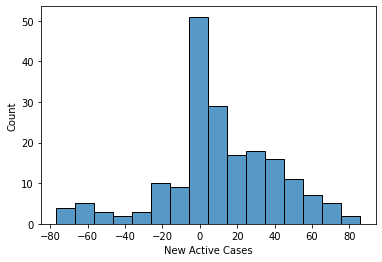

In [15]:
sns.histplot(data=jabar_2020, x='New Active Cases')

In [16]:
jabar_2021 = jabar[jabar['Date'].dt.year == 2021]

<AxesSubplot:xlabel='New Active Cases', ylabel='Count'>

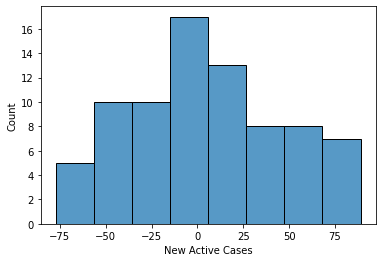

In [17]:
sns.histplot(data=jabar_2021, x='New Active Cases')

#### One Sample T-test (One-Tailed)

Hipotesis: **Rata-rata jumlah kasus aktif baru tahun 2020 di Jawa Barat itu kurang dari 10 kasus aktif baru**.

Jadi:
- **H0: μ2020 >= 10** (Rata-rata kasus aktif baru tahun 2020 lebih besar atau sama dengan 10 kasus.)
- **H1: μ2020 < 10** (Rata-rata kasus aktif baru tahun 2020 lebih kecil dari 10 kasus.)

In [19]:
tstat, pval = stats.ttest_1samp(jabar_2020['New Active Cases'], 10)
print(f'P-value: {pval/2}')
print(f'T-stat: {tstat}')

P-value: 0.36822387793710465
T-stat: 0.337052030075123


Dari hasil hypothesis testing ini, karena p-value lebih besar dari significant threshold maka H0 **diterima** dan **H1 ditolak** dimana rata-rata kasus aktif baru tahun 2020 leibh besar atau sama dengan 10 kasus.

#### One Sample T-test (Two-Tailed)

Hipotesis: **Rata-rata kasus aktif baru tahun 2021 di Jawa Barat adalah 15 kasus**.

Jadi:
- **H0: μ2020 = 15** (Rata-rata kasus aktif baru tahun 2021 sama dengan 15 kasus)
- **H1: μ2020 != 15** (Rata-rata kasus aktif baru tahun 2020 tidak sama dengan 15 kasus)

In [26]:
tstat, pval = stats.ttest_1samp(jabar_2021['New Active Cases'], 15)
print(f'P-value: {pval}')
print(f'T-stat: {tstat}')

P-value: 0.034655345307600914
T-stat: -2.150477571584096


In [27]:
if pval <= 0.05:
    print("Menolak Null Hypothesis (H0), menerima Alternative Hypothesis (H1).")
elif pval > 0.05:
    print("Menerima Null Hypothesis (H0), menolak Alternative Hypothesis (H1).")

Menolak Null Hypothesis (H0), menerima Alternative Hypothesis (H1).


Dari hasil hypothesis testing ini, karena p-value lebih kecil dari significant threshold maka **H0 ditolak** dan **H1 diterima** dimana rata-rata kasus aktif baru tahun 2021 tidak sama dengan 15 kasus.

#### Two Sample Independent (Two-Tailed)

In [39]:
print(f"2020 New Active Cases Mean: {round(jabar_2020['New Active Cases'].mean())}")
print(f"2021 New Active Cases Mean: {round(jabar_2021['New Active Cases'].mean())}")

2020 New Active Cases Mean: 11
2021 New Active Cases Mean: 5


Dari rata-rata kasus baru antara 2020 dan 2021 di Jawa Barat, ingin mencari tahu apakah perbedaan rata-rata tersebut signifikan atau tidak?

Jadi:
- **H0: μ2020 = μ2021** (Perbedaan rata-rata kasus aktif baru tahun 2020 dan rata-rata kasus aktif baru tahun 2021 tidak signifikan)
- **H1: μ2020 != μ2021** (Perbedaan rata-rata kasus aktif baru tahun 2020 tidak dan rata-rata kasus aktif baru tahun 2021 signifikan)

In [40]:
tstat, pval = stats.ttest_ind(jabar_2020['New Active Cases'], jabar_2021['New Active Cases'])
print(f'P-value: {pval}')
print(f'T-stat: {tstat}')

P-value: 0.19819372810987923
T-stat: 1.2899103717648157


In [41]:
if pval <= 0.05:
    print("Menolak Null Hypothesis (H0), menerima Alternative Hypothesis (H1).")
elif pval > 0.05:
    print("Menerima Null Hypothesis (H0), menolak Alternative Hypothesis (H1).")

Menerima Null Hypothesis (H0), menolak Alternative Hypothesis (H1).


Dari hasil hypothesis testing ini, perbedaan antara rata-rata kasus aktif baru tahun 2020 dan 2021 tidak signifikan. Karena p-value yang didapat itu lebih besar dari significant threshold.